<a href="https://colab.research.google.com/github/regisalbuquerque/projeto_pesquisa_ti/blob/main/AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [27]:
features_names = ['empty_server_form_handler',	'popup_window',	'https',	'request_from_other_domain',	'anchor_from_other_domain',	'is_popular',	'long_url',	'age_of_domain',	'ip_in_url']
target_name = ['is_phishing']
labels = ['0', '1']
dataset_name = 'Website Phishing Data Set'

col_names = features_names + target_name

df = pd.read_csv('https://raw.githubusercontent.com/regisalbuquerque/projeto_pesquisa_ti/main/databases/phishing.csv', header=0, delimiter=',')

X = df[features_names] # Features
y = df.is_phishing # Target variable

print(dataset_name)
df.info()

Website Phishing Data Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   empty_server_form_handler  1250 non-null   float64
 1   popup_window               1250 non-null   float64
 2   https                      1250 non-null   float64
 3   request_from_other_domain  1250 non-null   float64
 4   anchor_from_other_domain   1250 non-null   float64
 5   is_popular                 1250 non-null   float64
 6   long_url                   1250 non-null   float64
 7   age_of_domain              1250 non-null   int64  
 8   ip_in_url                  1250 non-null   int64  
 9   is_phishing                1250 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 97.8 KB


In [28]:
df.is_phishing.value_counts()

0    702
1    548
Name: is_phishing, dtype: int64

Website Phishing Data Set
0    702
1    548
Name: is_phishing, dtype: int64


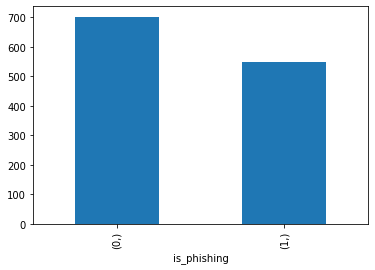

In [30]:
print(dataset_name)
df[target_name].value_counts().plot.bar()
print(df.is_phishing.value_counts())

In [33]:
df.describe()

,empty_server_form_handler,popup_window,https,request_from_other_domain,anchor_from_other_domain,is_popular,long_url,age_of_domain,ip_in_url,is_phishing
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,0.630000,0.373200,0.656400,0.412800,0.498800,0.507200,0.456800,0.600000,0.113600,0.43840
std,0.455924,0.337954,0.416026,0.402649,0.469441,0.399595,0.375028,0.490094,0.317452,0.49639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.00000
75%,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [17]:
df.empty_server_form_handler.value_counts()

1.0    724
0.0    399
0.5    127
Name: empty_server_form_handler, dtype: int64

In [18]:
df.is_phishing.describe()

count    1250.00000
mean        0.43840
std         0.49639
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: is_phishing, dtype: float64

In [ ]:
X.values

array([[0. , 0. , 0. , ..., 1. , 1. , 1. ],
       [1. , 0. , 0.5, ..., 0. , 1. , 0. ],
       [0. , 0. , 1. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0.5, 1. , ..., 0. , 1. , 0. ],
       [1. , 0.5, 1. , ..., 0. , 0. , 0. ]])

In [36]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state=0, max_depth=4)
arvore.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=0)

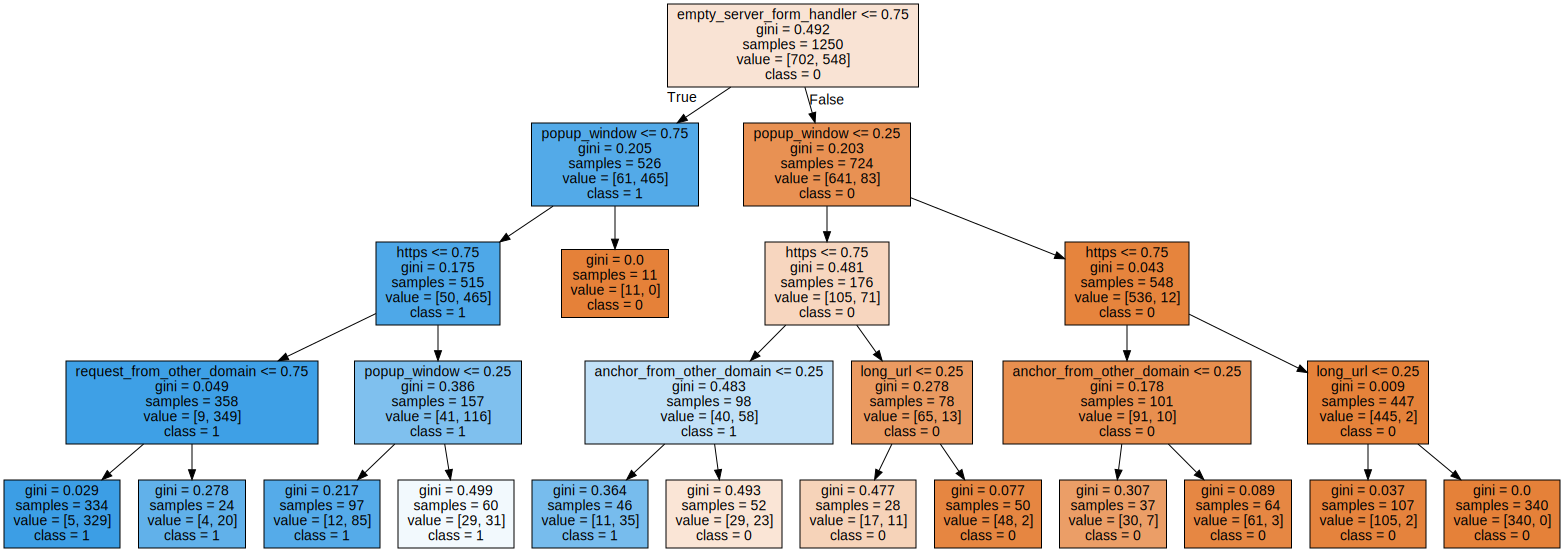

In [37]:
import graphviz
import pydotplus
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(arvore, out_file=None, 
                                feature_names=features_names,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

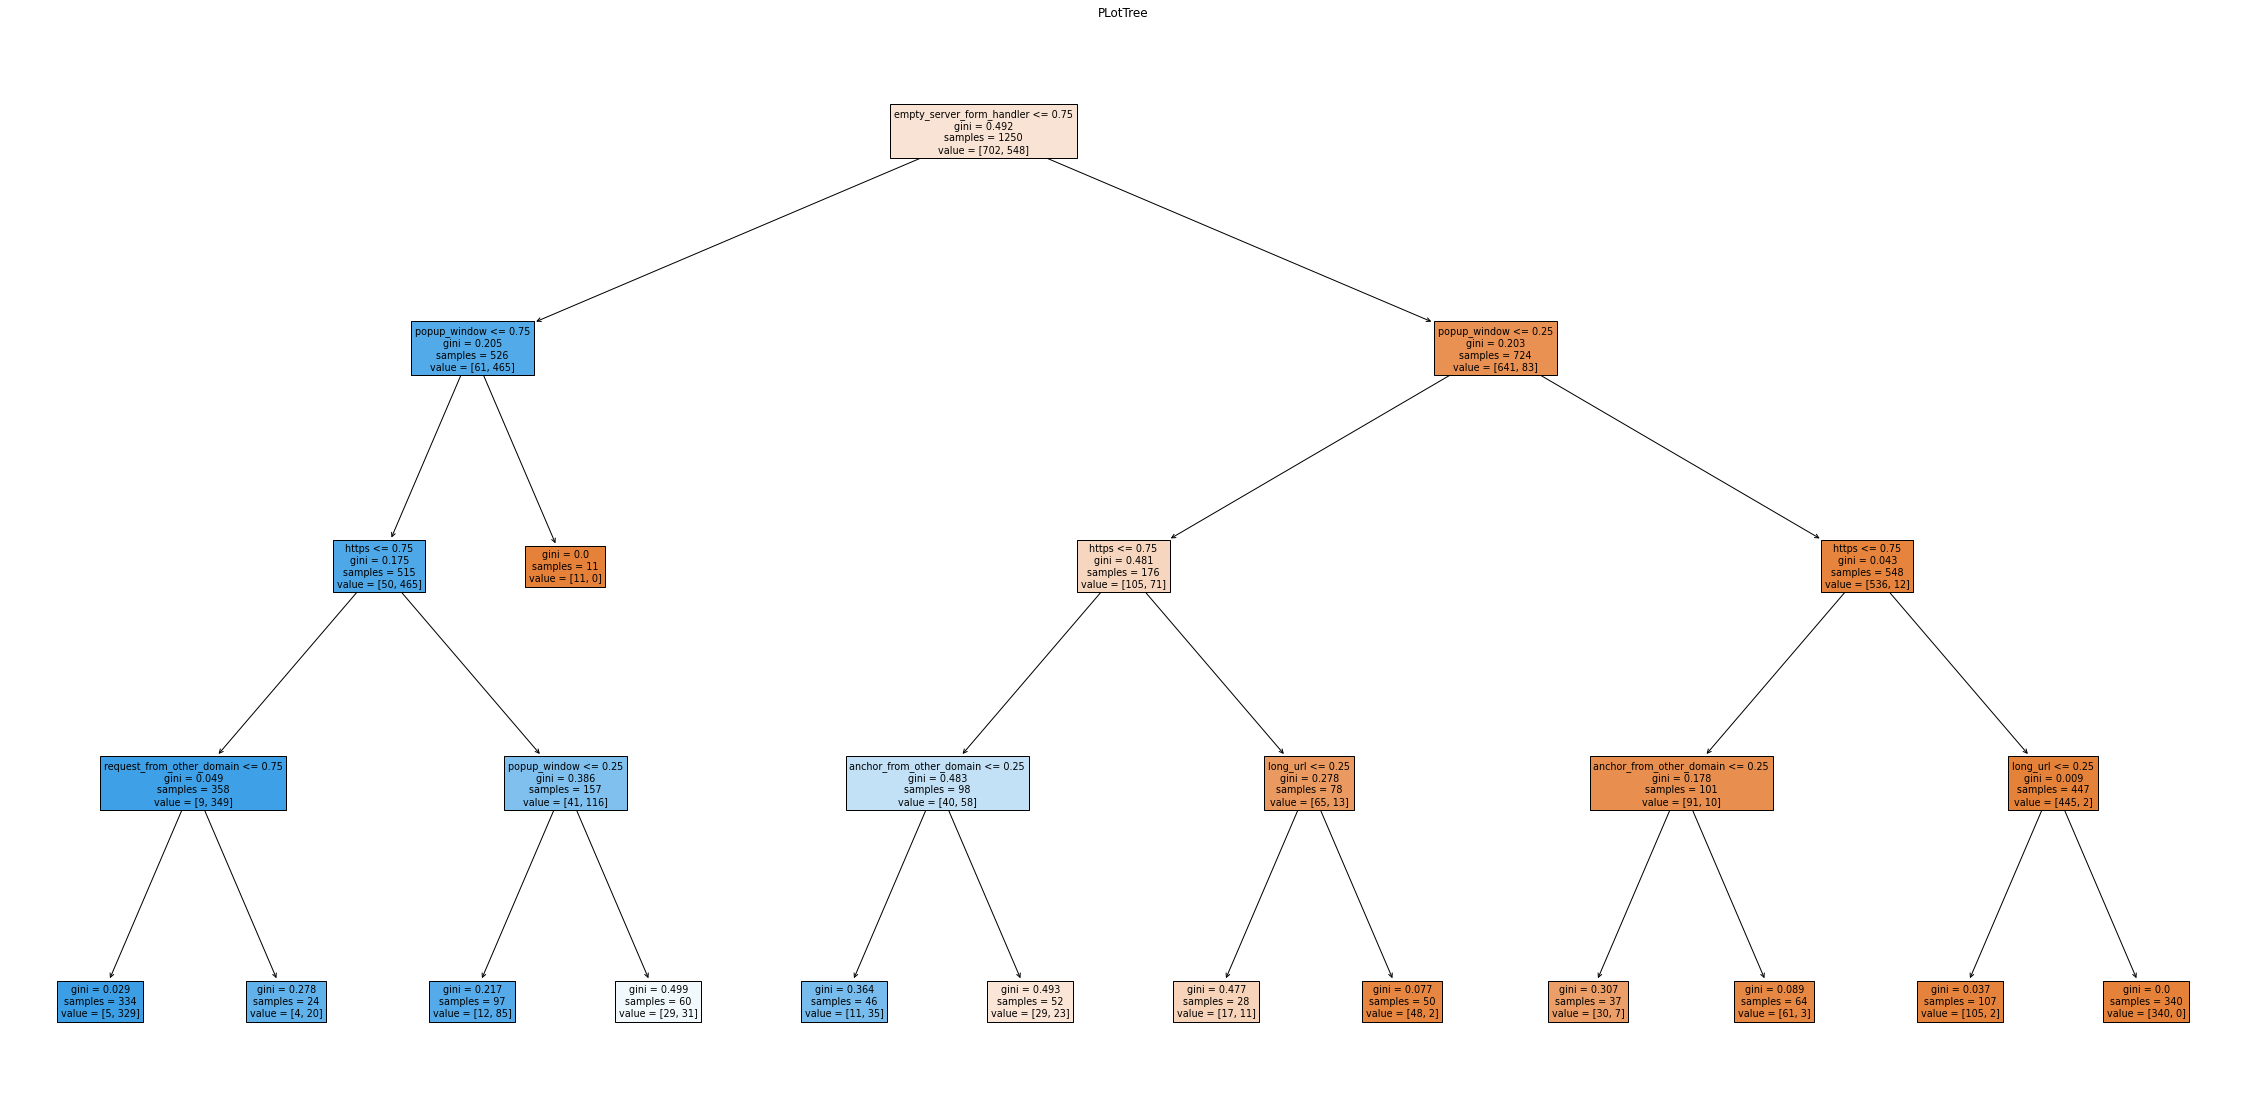

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
fig.savefig('test2png.png', dpi=150)
plot_tree(arvore, feature_names=features_names, filled=True)
plt.title("PLotTree")
plt.show()